In [3]:
# cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# load file (update path)
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
df.shape
df.head()

Saving Cleaned-ONLINE EDUCATION SYSTEM REVIEW.csv to Cleaned-ONLINE EDUCATION SYSTEM REVIEW.csv


,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Do elderly people monitor you?,...,Sleep time (Hours),Social_Media_Hours,Have separate room for studying?,Engaged in group studies?,Marks_Before,Online_Interaction,Online_Doubt_Clearing,Interested in?,Online_Performance,Satisfaction
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,Yes,...,6,1,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,5,1,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,Yes,...,7,1,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,6,2,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,7,2,Yes,yes,81-90,3,3,Both,6,Average


In [4]:
# change columns names
df = df.rename(columns={
    "Gender": "gender",
    "Home Location": "home_location",
    "Level of Education": "education_level",
    "Age(Years)": "age",
    "Number of Subjects": "num_subjects",
    "Device type used to attend classes": "device_type",
    "Economic status": "economic_status",
    "Family size": "family_size",
    "Internet facility in your locality": "internet_availability",
    "Do elderly people monitor you?": "elderly_monitoring",
    "Study time (Hours)": "study_hours",
    "Sleep time (Hours)": "sleep_hours",
    "Social_Media_Hours": "social_media_hours",
    "Have separate room for studying?": "separate_study_room",
    "Engaged in group studies?": "group_study",
    "Marks_Before": "marks_before",
    "Online_Interaction": "online_interaction",
    "Online_Doubt_Clearing": "online_doubt_clearing",
    "Interested in?": "interest_area",
    "Online_Performance": "online_performance",
    "Satisfaction": "satisfaction"
})

In [5]:
#cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# exclude textual open answers if any
#label_encoders = {}
#for col in cat_cols:
    #le = LabelEncoder()
    #df[col] = df[col].astype(str)  # ensure strings
    #df[col] = le.fit_transform(df[col])
    #label_encoders[col] = le

# Check
#df.head(7)

In [6]:
df['tech_readiness'] = (
    df['device_type'].apply(lambda x: 1 if x in ['Laptop', 'Smartphone'] else 0)
    + df['internet_availability']
)
df.head()

,gender,home_location,education_level,age,num_subjects,device_type,economic_status,family_size,internet_availability,elderly_monitoring,...,social_media_hours,separate_study_room,group_study,marks_before,online_interaction,online_doubt_clearing,interest_area,online_performance,satisfaction,tech_readiness
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,Yes,...,1,No,No,91-100,1,1,Practical,6,Average,6
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,No,91-100,1,1,Theory,3,Bad,2
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,Yes,...,1,Yes,No,71-80,1,1,Both,6,Bad,3
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,yes,91-100,1,2,Theory,4,Bad,5
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,yes,81-90,3,3,Both,6,Average,4


In [7]:
# split the mark column
df[['marks_before', 'marks_after']] = df['marks_before'] \
    .str.split('-', expand=True)

# Convert to integers
df['marks_before'] = df['marks_before'].astype(int)
df['marks_after'] = df['marks_after'].astype(int)
df.head()

,gender,home_location,education_level,age,num_subjects,device_type,economic_status,family_size,internet_availability,elderly_monitoring,...,separate_study_room,group_study,marks_before,online_interaction,online_doubt_clearing,interest_area,online_performance,satisfaction,tech_readiness,marks_after
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,Yes,...,No,No,91,1,1,Practical,6,Average,6,100
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,Yes,No,91,1,1,Theory,3,Bad,2,100
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,Yes,...,Yes,No,71,1,1,Both,6,Bad,3,80
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,No,yes,91,1,2,Theory,4,Bad,5,100
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,Yes,yes,81,3,3,Both,6,Average,4,90


In [8]:
df['engagement_cal'] = (
    df['study_hours'] +
    df['group_study'].map({'yes': 1, 'No': 0}) +
    df['online_interaction'] -
    df['social_media_hours']
)
df.head()

,gender,home_location,education_level,age,num_subjects,device_type,economic_status,family_size,internet_availability,elderly_monitoring,...,group_study,marks_before,online_interaction,online_doubt_clearing,interest_area,online_performance,satisfaction,tech_readiness,marks_after,engagement_cal
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,Yes,...,No,91,1,1,Practical,6,Average,6,100,3
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,No,91,1,1,Theory,3,Bad,2,100,7
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,Yes,...,No,71,1,1,Both,6,Bad,3,80,6
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,yes,91,1,2,Theory,4,Bad,5,100,3
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,yes,81,3,3,Both,6,Average,4,90,10


In [9]:
# cell 5
# Basic stats
display(df[['tech_readiness','engagement_cal','marks_before','marks_after','satisfaction']].describe())



,tech_readiness,engagement_cal,marks_before,marks_after
count,1033.000000,1033.000000,1033.000000,1033.000000
mean,4.237173,5.022265,73.351404,82.352372
std,1.234553,3.401221,14.187608,14.182631
min,1.000000,-8.000000,0.000000,10.000000
25%,3.000000,3.000000,71.000000,80.000000
50%,4.000000,5.000000,71.000000,80.000000
75%,5.000000,7.000000,81.000000,90.000000
max,6.000000,15.000000,91.000000,100.000000


In [10]:
# Group means by education level
satisfaction_map = {"Good": 3, "Average": 2, "Bad": 1}
df['satisfaction'] = df['satisfaction'].map(satisfaction_map)
group_means = df.groupby('education_level')[['engagement_cal','tech_readiness','marks_after','satisfaction']].mean()
display(group_means)


,engagement_cal,tech_readiness,marks_after,satisfaction
education_level,,,,
Post Graduate,5.116279,3.968992,75.658915,2.116279
School,4.149425,4.356322,85.287356,2.022989
Under Graduate,5.100367,4.266830,83.096695,1.991432


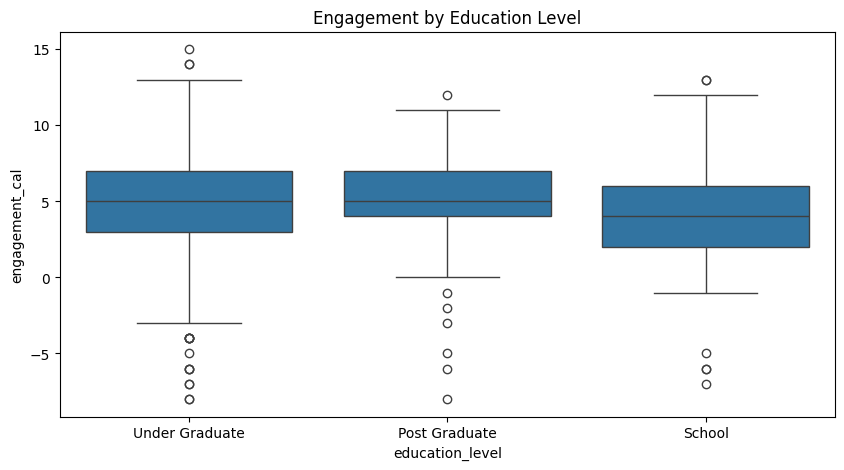

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x='education_level', y='engagement_cal', data=df)
plt.title('Engagement by Education Level')
plt.show()

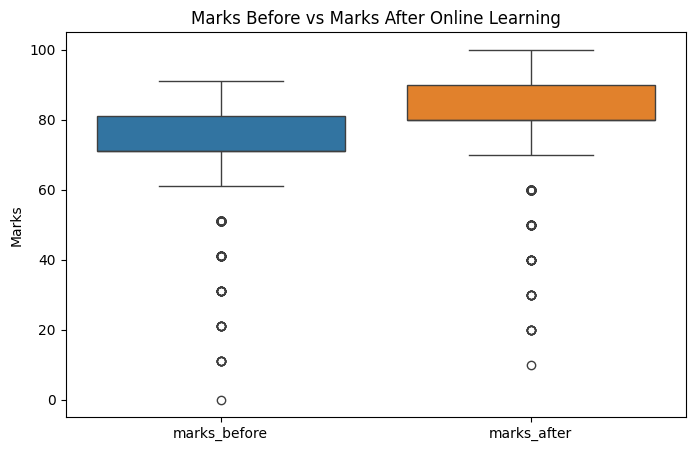

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['marks_before','marks_after']])
plt.title("Marks Before vs Marks After Online Learning")
plt.ylabel("Marks")
plt.show()

In [20]:
df.to_csv("Exploration-Cleaned-ONLINE EDUCATION SYSTEM REVIEW.csv", index=False)
from google.colab import files
files.download("Exploration-Cleaned-ONLINE EDUCATION SYSTEM REVIEW.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>